### Prob 1.

#### Soln 1.1

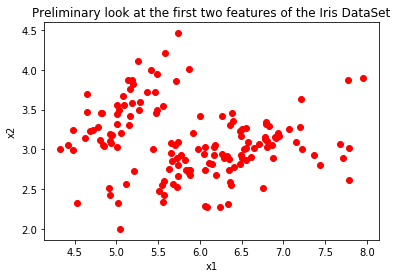

In [2]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import sys
import scipy.linalg as linalg

iris = np.genfromtxt("data/iris.txt", delimiter = None)
X,Y = iris[:,0:2], iris[:,-1]

plt.scatter(X[:,0:1],X[:,1:2], c = 'r')
plt.title('Preliminary look at the first two features of the Iris DataSet')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

I think there can be 3 clusters just looking at the plot above.

#### Soln 1.2

Running kMeans on data with k = 2, k = 5, k = 20 with no initialization set

Score : 57.87966196118197 and initialization : random


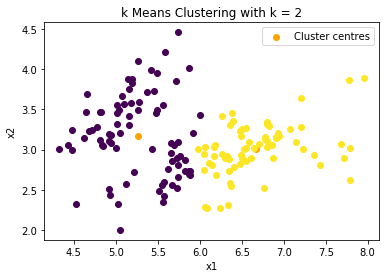

Score : 21.32551761594483 and initialization : random


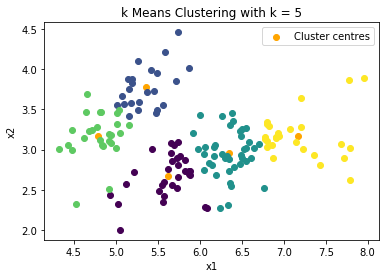

Score : 4.580280061097229 and initialization : random


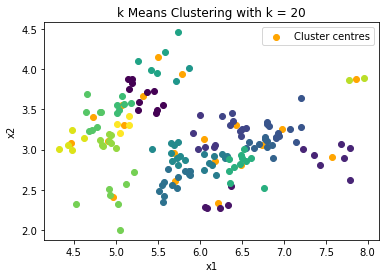

In [3]:
kVal = [2,5,20]
for k in kVal:
    (z, centre, mse) = ml.cluster.kmeans(X, k)
    ml.plotClassify2D(None, X, z)
    print('Score : ' + str(mse) + ' and initialization : random' )
    plt.scatter(centre[:,0], centre[:,1], c = 'orange', label = 'Cluster centres')
    plt.title('k Means Clustering with k = ' + str(k))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

Picking the cluster with the best scores for different k values depending on 5 different initializations

for k = 2 the min score was 57.877648396983034 and the initialization was random


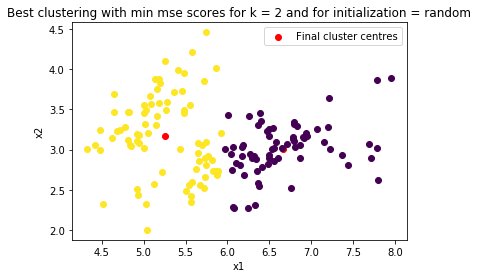

for k = 5 the min score was 20.906080308386695 and the initialization was random


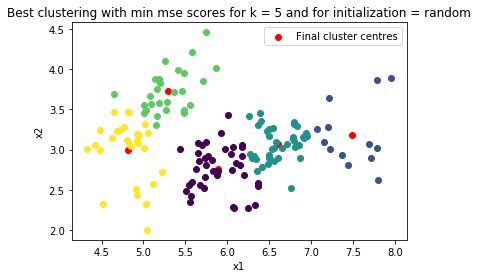

for k = 20 the min score was 4.557121877288913 and the initialization was k++


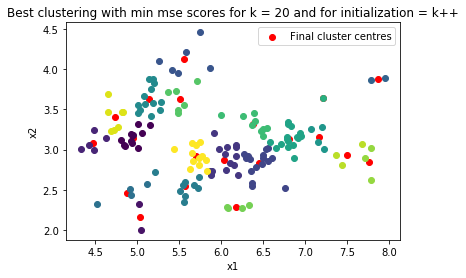

In [25]:
initial = ['random' ,'farthest', 'k++', 'custom', 'custom']
mse_scores = np.zeros((len(kVal), len(initial)))

for i,k in enumerate(kVal):
    min_mse = sys.maxsize
    for j,init in enumerate(initial):
        if init == 'custom':
            m = X.shape[1]
            C_init = []
            for l in range(k):
                Xr = np.random.uniform(X.min(axis=0)[0],X.max(axis=0)[0],m)
                C_init.append(Xr.tolist())
            
            C_init_arr = np.asarray(C_init)
            (z, centre, mse_d) = ml.cluster.kmeans(X, k, init = C_init_arr)
        else:
            (z, centre, mse_d) = ml.cluster.kmeans(X, k, init = init)
        if mse_d < min_mse:
            min_mse = mse_d
            min_index = j
            z_min_mse = z
            c_min_mse = centre
            
    print('for k = ' + str(k) + ' the min score was ' + str(min_mse) + ' and the initialization was ' + str(initial[min_index]))
    ml.plotClassify2D(None, X, z_min_mse)
    plt.scatter(c_min_mse[:,0], c_min_mse[:,1], c = 'red', label = 'Final cluster centres')
    plt.title('Best clustering with min mse scores for k = ' + str(k) + ' and for initialization = ' + str(initial[min_index]))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

#### Soln 1.3

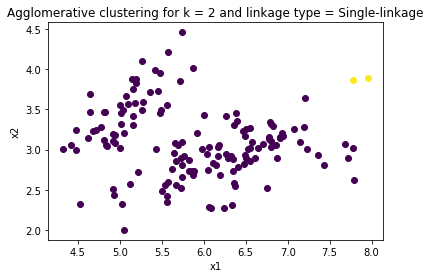

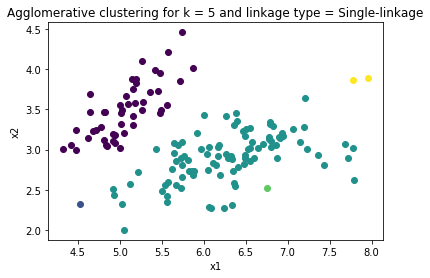

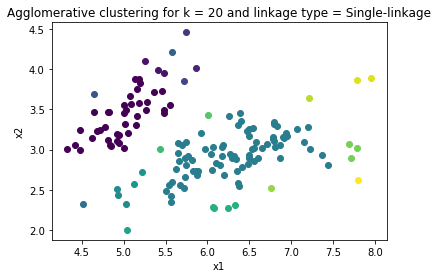

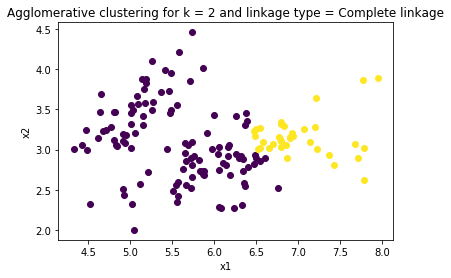

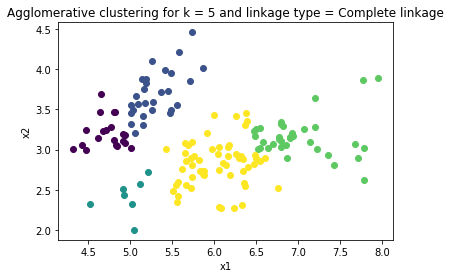

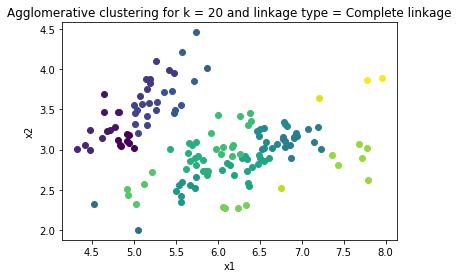

In [32]:
linkage_type = ['min', 'max']                              # min for single linkage, max for complete linkage
link_map = {'min' : 'Single-linkage' , 'max' : 'Complete linkage'}
for link in linkage_type:
    for k in kVal:
        (z, join) = ml.cluster.agglomerative(X, k, method = link)
        ml.plotClassify2D(None, X, z)
        plt.title('Agglomerative clustering for k = ' + str(k) + ' and linkage type = ' + link_map[link])
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

#### Soln 1.4

K-means is generally computationally more efficient than agglomerative clustering.
Running agglomerative clustering multiple times does not produce different results, unlike running k-Means clustering multiple times(as k-Means depends gets different initial cluster centres each time it runs). Complete linkage looks similar to k-Means clustering, however single-linkage is very different from k-Means clustering.

### Prob 2.

Picking 8 random faces from the data to understand the data format

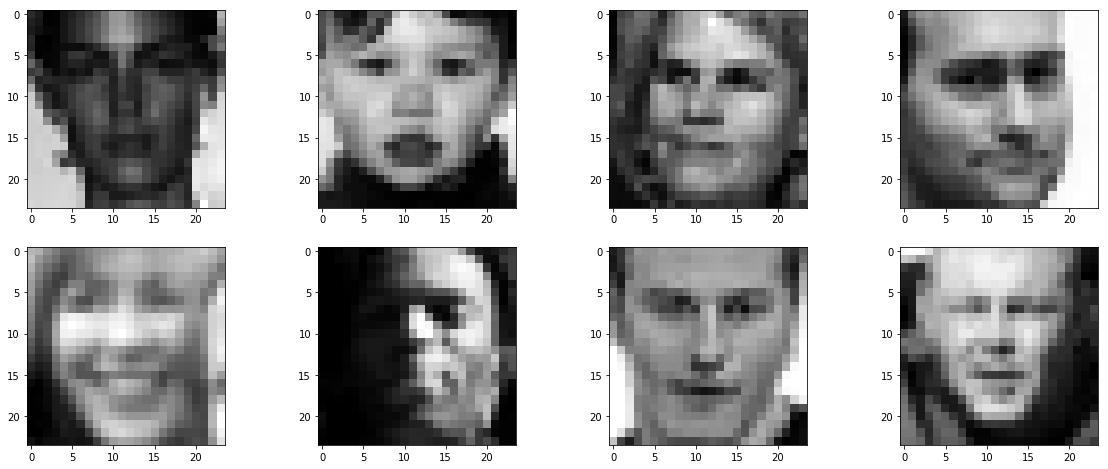

In [42]:
import random

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
axes = axes.flatten()
# pick a data point i for display
for i in range(8):
    j = random.randint(1,X.shape[0])
    img = np.reshape(X[j,:],(24,24)) # convert vectorized data to 24x24 image patches

    axes[i].imshow( img.T , cmap="gray") # display image patch; you may have to squint
plt.show()

#### Soln 2.1

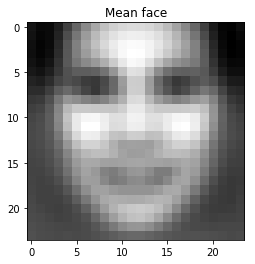

In [9]:
mean = np.mean(X, axis=0)
X0 = X - mean

mean_face = np.reshape(mean, (24,24))
plt.imshow( mean_face.T , cmap="gray") # display image patch; you may have to squint
plt.title('Mean face')
plt.show()

#### Soln 2.2

In [35]:
U,S,Vh = linalg.svd(X0, full_matrices=False)
W = U.dot(np.diag(S))
X0_approx = W.dot(Vh)

print(W.shape)
print(Vh.shape)

(4916, 576)
(576, 576)


#### Soln 2.3

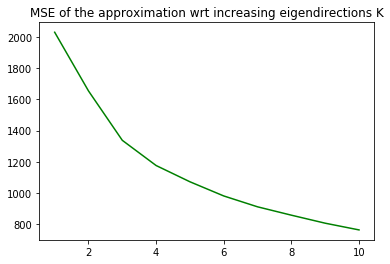

In [82]:
eigen = range(1,11,1)
mse = [None] * len(eigen)
for i,k in enumerate(eigen):
    X_approx = W[:,:k].dot(Vh[0:k,:])
    mse[i] = (np.mean((X_approx - X0_approx) ** 2))
plt.plot(eigen, mse, c = 'g')
plt.title('MSE of the approximation wrt increasing eigendirections K')
plt.show()

#### Soln 2.4

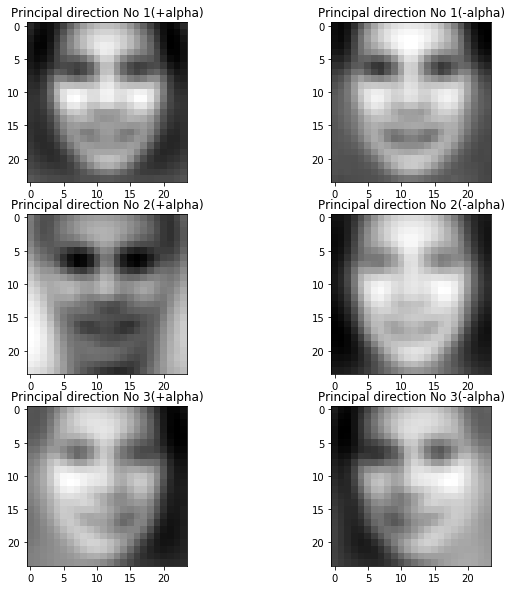

In [68]:
f, axes = plt.subplots(3,2, figsize = (10,10))
for j in range(3):
    alpha = 2 * np.median(np.abs(W[:,j]))
    original_image1 = mean + alpha * Vh[j,:]
    img1 = np.reshape(original_image1,(24,24))
    original_image2 = mean - alpha * Vh[j,:]
    img2 = np.reshape(original_image2,(24,24))
    
    axes[j][0].imshow(img1.T, cmap = "gray")
    axes[j][0].set_title('Principal direction No ' + str(j + 1) + '(+alpha)')
    axes[j][1].imshow(img2.T, cmap = "gray") 
    axes[j][1].set_title('Principal direction No ' + str(j + 1) + '(-alpha)')

#### Soln 2.5

Choose two random faces from the dataset and reconstruct them using the first K principal directions.

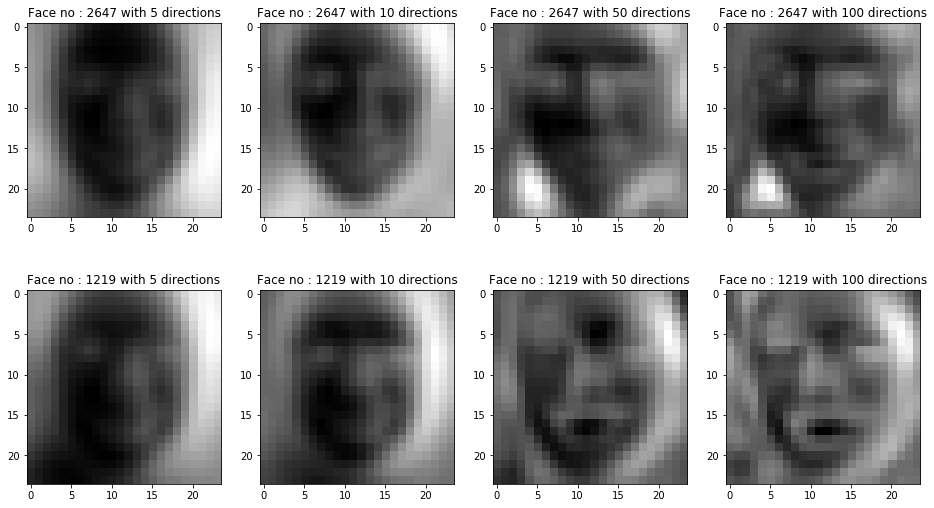

In [72]:
f, axes = plt.subplots(2,4, figsize = (16,9))
faces = [random.randint(1,X.shape[0]), random.randint(1,X.shape[0])]
K = [5, 10, 50, 100]
for i,face in enumerate(faces):
    for j,k in enumerate(K):
        X_approx = W[face - 1,:k].dot(Vh[:k,:])
        img = np.reshape(X_approx,(24,24))
        axes[i][j].imshow(img.T, cmap = "gray")
        axes[i][j].set_title('Face no : ' + str(face) + ' with ' + str(k) + ' directions')

#### Soln 2.6

I choose 25 faces at random to display them on the first two principal components

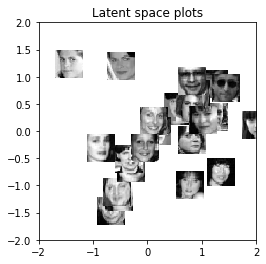

In [78]:
idx = np.random.randint(1,X.shape[0],25)
import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) )
    plt.title('Latent space plots')
plt.show()

## Statement of Collaboration

I did not collaborate with anyone for this homework. However, I went through thess youtube videos to understand clustering https://www.youtube.com/watch?v=_aWzGGNrcic and https://www.youtube.com/watch?v=XJ3194AmH40 and this video to understand how PCA and SVD work https://www.youtube.com/watch?v=F-nfsSq42ow